<a href="https://colab.research.google.com/github/DeveloperAkram/Colab-Notebooks/blob/master/DT_04_Ensemble_technique_Bagging%2C_Random_Forest%2C_Boosting_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the Dependencies and Dataset**

In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [91]:
from google.colab import drive
drive.mount('/content/akramchy')

Drive already mounted at /content/akramchy; to attempt to forcibly remount, call drive.mount("/content/akramchy", force_remount=True).


In [92]:
dataset = pd.read_csv('/content/akramchy/MyDrive/Colab Notebooks/Decision Trees - Basics/Movie_classification.csv')

In [93]:
dataset.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [94]:
dataset.tail()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
501,21.2526,78.86,0.427,36624.115,142.6,8.68,8.775,8.620,8.970,6.8,492480,NO,186.96,243.584,Action,27,561,44800,0
502,20.9054,78.86,0.427,33996.600,150.2,8.78,8.945,8.770,8.930,7.8,482875,YES,132.24,263.296,Action,20,600,41200,0
503,21.2152,78.86,0.427,38751.680,164.5,8.83,8.970,8.855,9.010,7.8,532239,NO,109.56,243.824,Comedy,31,576,47800,0
504,22.1918,78.86,0.427,37740.670,162.8,8.73,8.845,8.800,8.845,6.8,496077,YES,158.80,303.520,Comedy,47,607,44000,0
505,20.9482,78.86,0.427,33496.650,154.3,8.64,8.880,8.680,8.790,6.8,518438,YES,205.60,203.040,Comedy,45,604,38000,0


In [95]:
dataset.shape

(506, 19)

In [96]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [97]:
dataset.isnull().sum()

Marketing expense       0
Production expense      0
Multiplex coverage      0
Budget                  0
Movie_length            0
Lead_ Actor_Rating      0
Lead_Actress_rating     0
Director_rating         0
Producer_rating         0
Critic_rating           0
Trailer_views           0
3D_available            0
Time_taken             12
Twitter_hastags         0
Genre                   0
Avg_age_actors          0
Num_multiplex           0
Collection              0
Start_Tech_Oscar        0
dtype: int64

**Missing Value Imputation**

In [98]:
dataset['Time_taken'].mean()

157.39149797570855

In [99]:
dataset['Time_taken'].fillna(value = dataset['Time_taken'].mean(), inplace = True)

In [100]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

**Dummy Variable Creation**

In [101]:
dataset.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [102]:
dataset = pd.get_dummies(dataset, columns= ['3D_available', 'Genre'], drop_first= True)

In [103]:
dataset.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,1,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,1,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,1,0,0,1,0


X-y Split

In [104]:
X = dataset.loc[:, dataset.columns != 'Start_Tech_Oscar']
type(X)

pandas.core.frame.DataFrame

In [105]:
X.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,0,0,1,0


In [106]:
X.shape

(506, 20)

In [107]:
y = dataset['Start_Tech_Oscar']
type(y)

pandas.core.series.Series

In [108]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Start_Tech_Oscar, dtype: int64

In [109]:
y.shape

(506,)

**Train - Test Split**

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X_train, X_test, y_tarin, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [112]:
X_train.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
220,27.1618,67.40,0.493,38612.805,162.0,8.485,8.640,8.485,8.670,8.52,480270,174.68,224.272,23,536,53400,0,0,0,1
71,23.1752,76.62,0.587,33113.355,91.0,7.280,7.400,7.290,7.455,8.16,491978,200.68,263.472,46,400,43400,0,0,0,0
240,22.2658,64.86,0.572,38312.835,127.8,6.755,6.935,6.800,6.840,8.68,470107,204.80,224.320,24,387,54000,1,1,0,0
6,21.7658,70.74,0.476,33396.660,140.1,7.065,7.265,7.150,7.400,8.96,459241,139.16,243.664,41,522,45800,1,0,0,1
417,538.8120,91.20,0.321,29463.720,162.6,9.135,9.305,9.095,9.165,6.96,302776,172.16,301.664,60,589,20800,1,0,0,0


In [113]:
print(X.shape, X_train.shape, X_test.shape)

(506, 20) (404, 20) (102, 20)


**Training Classification Tree**

In [114]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier(max_depth = 3)

In [115]:
clftree.fit(X_train, y_tarin)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Predict values using trained model

In [116]:
y_tarin_pred = clftree.predict(X_train)
y_test_pred = clftree.predict(X_test)

In [117]:
y_test_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0])

**Model Performance**

In [118]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [119]:
confusion_matrix(y_tarin, y_tarin_pred)

array([[172,  14],
       [126,  92]])

In [120]:
confusion_matrix(y_test, y_test_pred)

array([[39,  5],
       [41, 17]])

In [121]:
accuracy_score(y_tarin, y_tarin_pred)

0.6534653465346535

In [122]:
accuracy_score(y_test, y_test_pred)

0.5490196078431373

**Plotting decision tree**

In [123]:
dot_data = tree.export_graphviz(clftree, out_file= None, feature_names= X_train.columns, filled= True)

In [124]:
from IPython.display import Image

In [125]:
import pydotplus

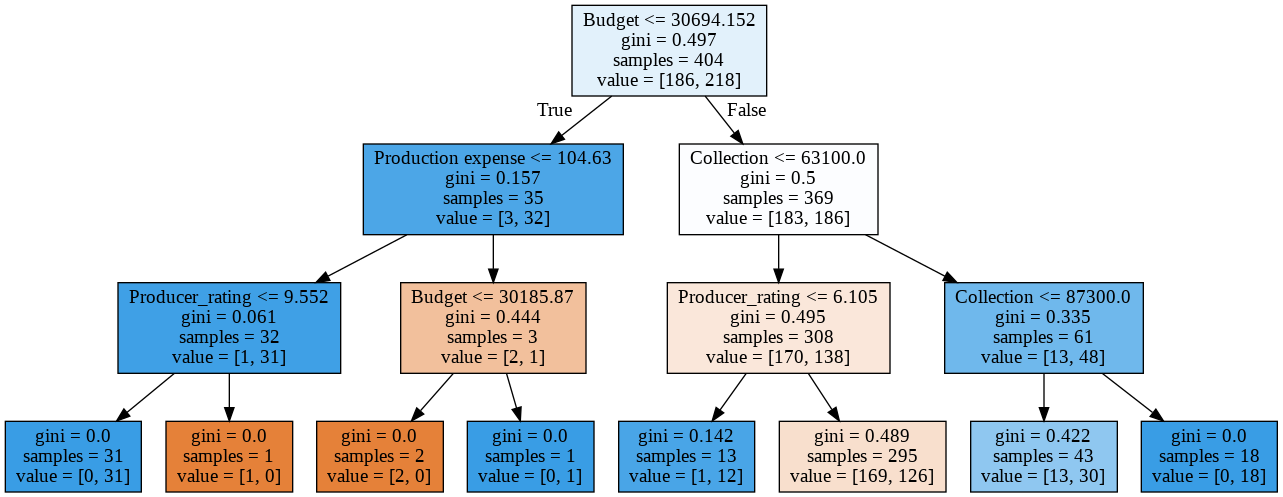

In [126]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

**Controlling Tree Growth**

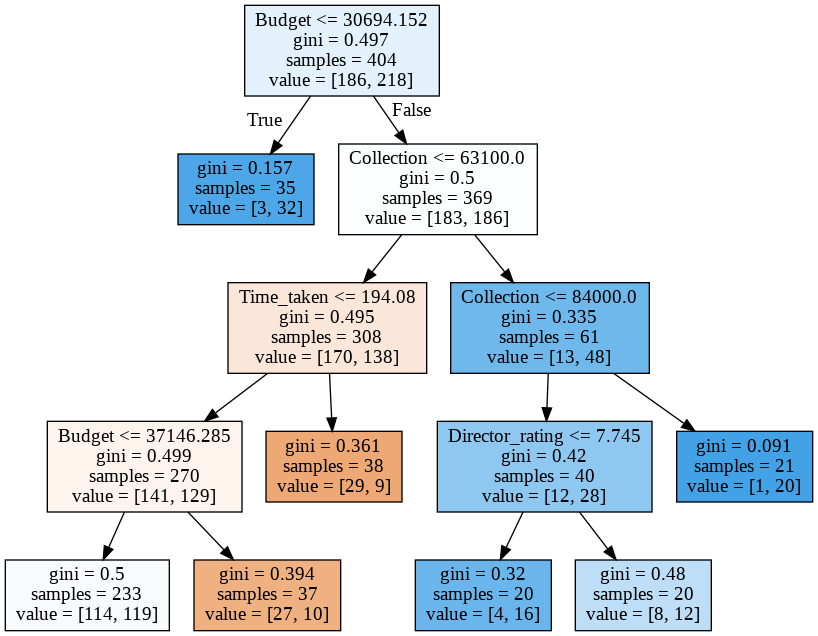

In [127]:
clftree2 = tree.DecisionTreeClassifier(min_samples_leaf= 20, max_depth= 4)
clftree2.fit(X_train, y_tarin)

dot_data = tree.export_graphviz(clftree2, out_file= None, feature_names= X_train.columns, filled= True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

In [128]:
accuracy_score(y_test, clftree2.predict(X_test))

0.5588235294117647

**Ensemble Technique 1 - Bagging**

In [129]:
from sklearn import tree
clftree3 = tree.DecisionTreeClassifier()

In [130]:
from sklearn.ensemble import BaggingClassifier

In [131]:
bag_clf = BaggingClassifier(base_estimator= clftree3, n_estimators= 1000,
                            bootstrap = True, n_jobs = -1,
                            random_state = 42)

In [132]:
bag_clf.fit(X_train, y_tarin)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [133]:
confusion_matrix(y_test, bag_clf.predict(X_test))

array([[28, 16],
       [22, 36]])

In [134]:
accuracy_score(y_test, bag_clf.predict(X_test))

0.6274509803921569

**Ensemble Technique 2 - Random Forest**




In [135]:
from sklearn.ensemble import RandomForestClassifier

In [136]:
rf_clf = RandomForestClassifier(n_estimators= 1000, n_jobs= -1, random_state= 42)

In [137]:
rf_clf.fit(X_train, y_tarin)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [138]:
confusion_matrix(y_test, rf_clf.predict(X_test))

array([[25, 19],
       [18, 40]])

In [139]:
accuracy_score(y_test, rf_clf.predict(X_test))

0.6372549019607843

**Optimizer the value of Hyperperameter - Grid Search**

In [140]:
from sklearn.model_selection import GridSearchCV

In [141]:
rf_clf = RandomForestClassifier(n_estimators = 250, random_state = 42)

In [142]:
params_grid = {"max_features" : [4,5,6,7,8,9,10],
              "min_samples_split": [2,3,10]}

In [143]:
grid_search = GridSearchCV(rf_clf, params_grid, n_jobs= -1, cv= 5, scoring= 'accuracy')

In [144]:
grid_search.fit(X_train, y_tarin)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=250, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [145]:
grid_search.best_params_

{'max_features': 6, 'min_samples_split': 3}

In [146]:
cvrf_clf = grid_search.best_estimator_

In [147]:
print(cvrf_clf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=6,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


In [148]:
accuracy_score(y_test, cvrf_clf.predict(X_test))

0.6274509803921569

In [149]:
confusion_matrix(y_test, cvrf_clf.predict(X_test))

array([[25, 19],
       [19, 39]])

**Ensemble Technique 3.a - Gradient Boosting**

In [150]:
from sklearn.ensemble import GradientBoostingClassifier

In [151]:
gbc_clf = GradientBoostingClassifier()

In [152]:
gbc_clf.fit(X_train, y_tarin)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [153]:
accuracy_score(y_test, gbc_clf.predict(X_test))

0.5784313725490197

In [154]:
gbc_clf2 = GradientBoostingClassifier(learning_rate= 0.02, n_estimators= 1000, max_depth= 1)
gbc_clf2.fit(X_train, y_tarin)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [155]:
accuracy_score(y_tarin, gbc_clf2.predict(X_train))

0.7623762376237624

In [156]:
accuracy_score(y_test, gbc_clf2.predict(X_test))

0.6176470588235294

**Ensemble Technique 3.b - Ada Boost**

In [157]:
from sklearn.ensemble import AdaBoostClassifier

In [158]:
ada_clf = AdaBoostClassifier(learning_rate= 0.02, n_estimators= 5000)

In [159]:
ada_clf.fit(X_train, y_tarin)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.02,
                   n_estimators=5000, random_state=None)

In [160]:
accuracy_score(y_tarin, ada_clf.predict(X_train))

0.8886138613861386

In [161]:
accuracy_score(y_test, ada_clf.predict(X_test))

0.6274509803921569

In [162]:
ada_clf2 = AdaBoostClassifier(rf_clf, learning_rate= 0.02, n_estimators= 500)

In [163]:
ada_clf2.fit(X_train, y_tarin)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                       

In [164]:
accuracy_score(y_test, ada_clf2.predict(X_test))

0.6176470588235294

**Ensemble Technique 3.c - XGBoost**

In [165]:
import xgboost as xgb

### Paraeters Tuning

1. General Parameters: Guide the overall functioning
2. Booster Parameters Guide the individual booster (tree/regression) at each step
3. Learning Task Parameters: Guide the optimization performed

In [166]:
xgb_clf = xgb.XGBClassifier(max_depth=5, n_estimators= 10000, learning_rate= 0.3, n_jobs= -1)

In [167]:
xgb_clf.fit(X_train, y_tarin)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=10000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [168]:
accuracy_score(y_test, xgb_clf.predict(X_test))

0.6666666666666666

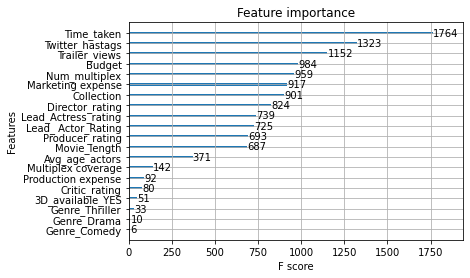

In [169]:
xgb.plot_importance(xgb_clf)

In [170]:
xgb_clf = xgb.XGBClassifier(n_estimators=500, learning_rate= 0.1, random_state= 42)

In [171]:
param_test1 = {
    'max_depth': range(3,10,2),
    'gamma': [0.1,0.2,0.3],
    'subsample':[0.8,0.9],
    'colsample_bytree': [0.8, 0.9],
    'reg_alpha': [1e-2, 0.1, 1]
}

In [172]:
grid_search = GridSearchCV(xgb_clf, param_test1, n_jobs= -1, cv=5, scoring= 'accuracy')

In [173]:
grid_search.fit(X_train, y_tarin)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=500, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'gamma': [0.1, 0.2, 0.3], 'max_depth': range(3, 10, 2),
                         'reg_alpha': [0

In [174]:
cvxg_clf = grid_search.best_estimator_

In [175]:
accuracy_score(y_test, cvxg_clf.predict(X_test))

0.6372549019607843

In [176]:
grid_search.best_params_

{'colsample_bytree': 0.9,
 'gamma': 0.1,
 'max_depth': 9,
 'reg_alpha': 1,
 'subsample': 0.8}